# 次数分布を描く

C++で生成した edgelist
- `result/er.csv`: ER(N=1e4,p=2/N)
- `result/ws.csv`: WS(N=1e4,k=4,p=0.2)
- `result/ba.csv`: BA(N=1e6,N0=5,m=3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [2]:
graph_names = ['er', 'ws', 'ba']
degrees = {name: pd.read_csv(f'../result/{name}.deg', header=None)[0] for name in graph_names}

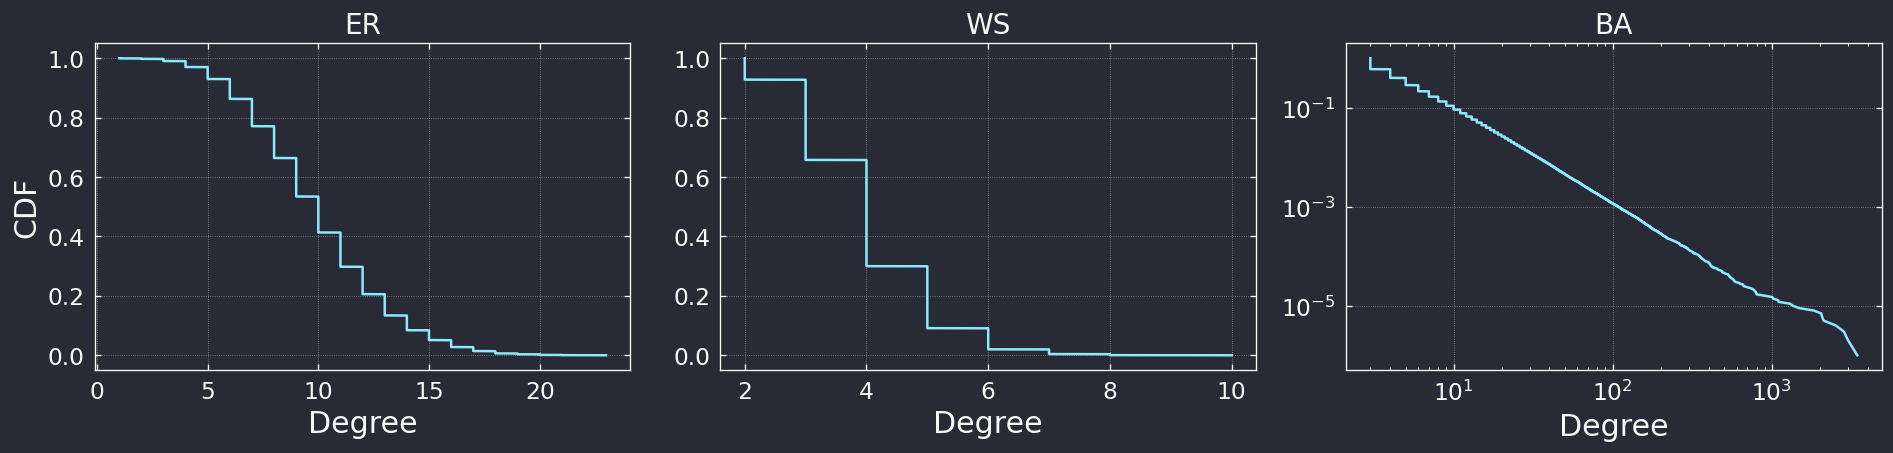

In [3]:
def draw_cdf(xs, ax=None, set_xlabel=True, set_ylabel=True, title=None, loglog=False):
    if not ax: return
    n = len(xs)
    cdf = [(i+1)/n for i in range(n)]
    ax.plot(sorted(xs, reverse=True), cdf)
    if set_xlabel: ax.set_xlabel('Degree')
    if set_ylabel: ax.set_ylabel('CDF')
    if title: ax.set_title(title)
    if loglog: ax.set_xscale('log'); ax.set_yscale('log')

_, axes = plt.subplots(1, 3, figsize=(16,4))
for i, name in enumerate(graph_names):
    draw_cdf(degrees[name], ax=axes[i], set_ylabel=(i==0), title=name.upper(), loglog=(i==2))
plt.tight_layout()
plt.savefig('../degree_dist.png')

## Harry Potter

```sh
# 重複リンク削除
$ awk '{if($1<$2){ cnt[$1" "$2]++ }else{ print cnt[$2" "$1]++ }}END{for(link in cnt){print link}}' hp.csv > hp.txt

# 次数計算
$ awk '{cnt[$1]++; cnt[$2]++}END{for(i in cnt)print cnt[i]}' hp.txt | sort -k1gr > hp.deg
```

In [5]:
deg_hp = pd.read_csv(f'../hp/hp.deg', header=None)[0]

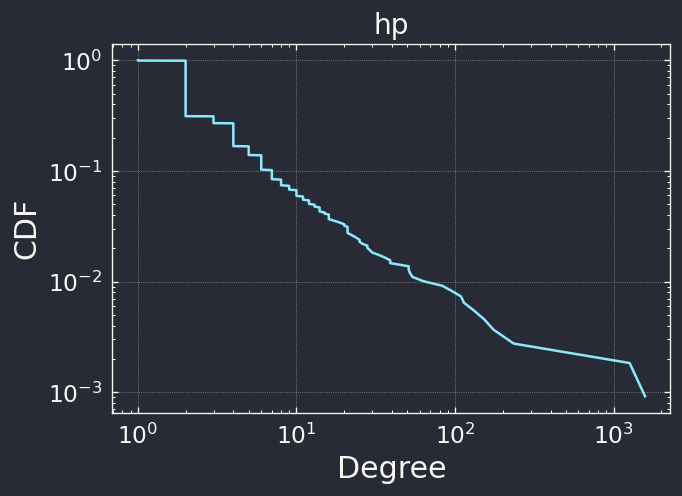

In [15]:
_, ax = plt.subplots()
draw_cdf(deg_hp, ax=ax, title='hp', loglog=True)

In [14]:
# Pythonでやる
links = pd.read_csv('../hp/hp.csv', sep=' ', header=None)
display(links.head())

cnt = dict()
for link in links.values:
    s, t = link[0], link[1]
    key = f'{s} {t}' if s < t else f'{t} {s}'
    if key in cnt:
        cnt[key] += 1
    else:
        cnt[key] = 1

min_links = pd.DataFrame([s.split() for s in cnt.keys()])
display(min_links.head())

,0,1
0,harry,potter
1,potter,is
2,is,a
3,a,series
4,series,of


,0,1
0,harry,potter
1,is,potter
2,a,is
3,a,series
4,of,series
